# Analyze IU-XRAY data for possible biases

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
plot_style = "ggplot"
colors = ['red','blue','yellow']

## Analyze overall normality

In [144]:
sex_matched_normaltiy = pd.read_csv("./sex_matched_normality.csv")

In [145]:
sex_matched_normaltiy.head()

,Unnamed: 0,pat_id,sex,normal
0,0,CXR35,m,Abnormal
1,1,CXR129,m,Normal
2,2,CXR160,f,Abnormal
3,3,CXR186,f,Normal
4,4,CXR246,m,Normal


In [146]:
overall_distribution = sex_matched_normaltiy.normal.value_counts()

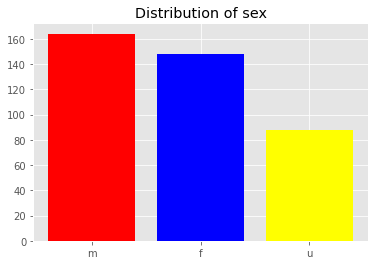

In [147]:
with plt.style.context(plot_style):
    normality_counts = sex_matched_normaltiy.sex.value_counts()
    plt.bar(normality_counts.index,normality_counts, color=colors)
    plt.title("Distribution of sex")

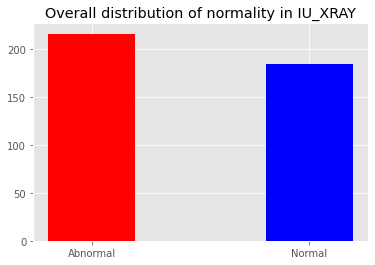

In [148]:
with plt.style.context(plot_style):
    plt.bar(overall_distribution.index,overall_distribution, width=0.4, color=colors)
    plt.title("Overall distribution of normality in IU_XRAY")

## Analyze for each sex

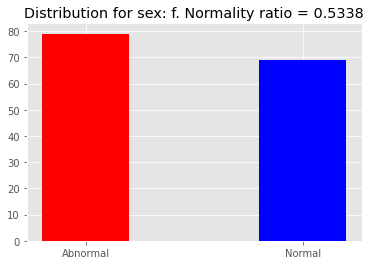

Abnormal    79
Normal      69
Name: normal, dtype: int64


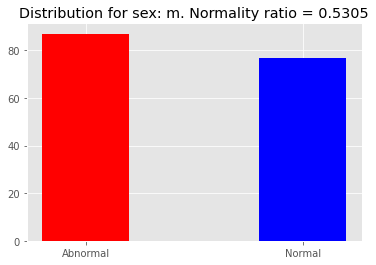

Abnormal    87
Normal      77
Name: normal, dtype: int64


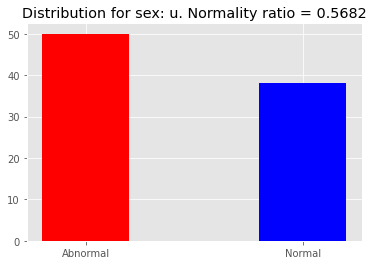

Abnormal    50
Normal      38
Name: normal, dtype: int64


In [149]:
for _, sex_group in sex_matched_normaltiy.groupby("sex"):
    sex = sex_group.sex.iloc[0]
    sex_specific_count = sex_group.normal.value_counts().sort_index()

    normality_ratio = sex_specific_count[0]/(sex_specific_count[0]+sex_specific_count[1])

    with plt.style.context(plot_style):
        plt.bar(sex_specific_count.index, sex_specific_count,  width=0.4, color=colors)
        plt.title(f"Distribution for sex: {sex}. Normality ratio = {round(normality_ratio,4)}")
        plt.show()

    print(sex_specific_count)